**Iris Classification**

**Importing the libraries**

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [2]:
df=pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.sample(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,35,4.9,3.1,1.5,0.1,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df[df.duplicated()]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


**Exploratory Data Analysis (EDA)**

<Axes: >

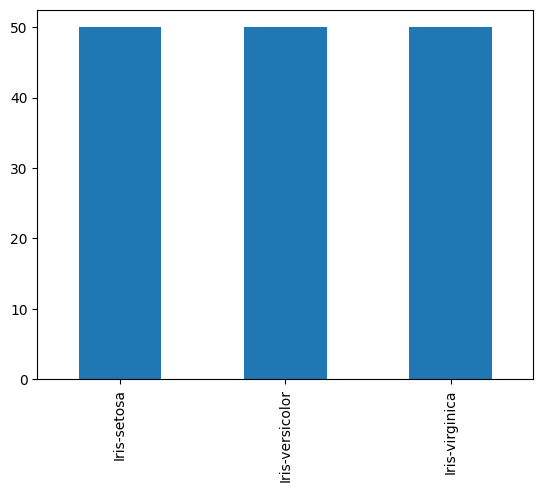

In [ ]:
import matplotlib.pyplot as plt
df['Species'].value_counts().plot(kind='bar')

<Axes: >

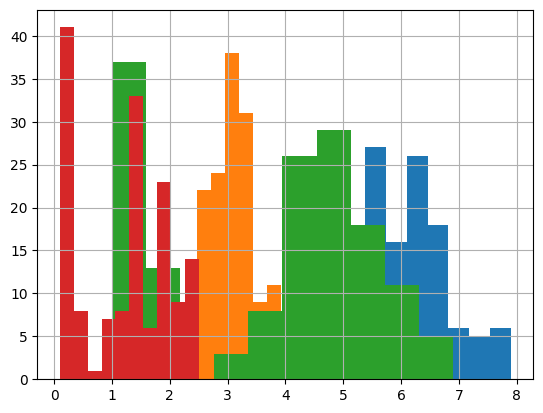

In [29]:
#Plotting the histogram of all features toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

<Axes: ylabel='Species'>

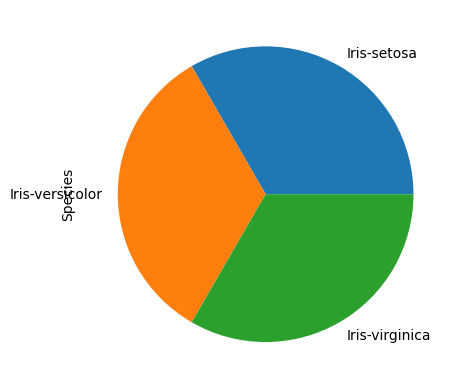

In [15]:
df['Species'].value_counts().plot.pie()


<Figure size 800x600 with 0 Axes>

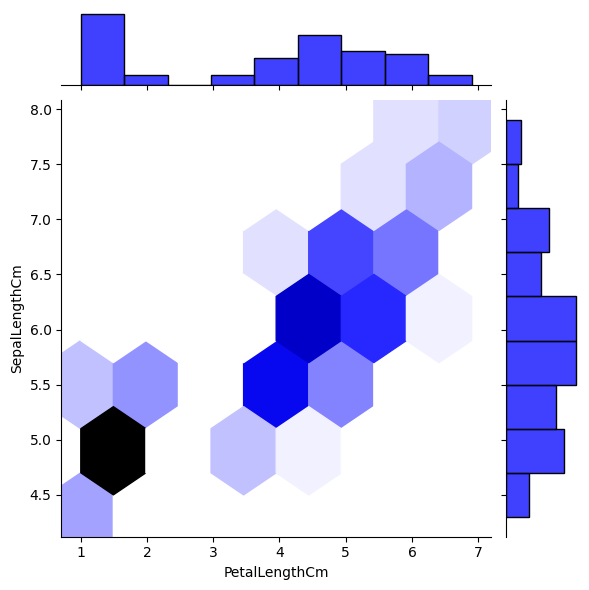

In [30]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='PetalLengthCm', y='SepalLengthCm', data=df, kind='hex', color='blue')
plt.show()


<Figure size 800x600 with 0 Axes>

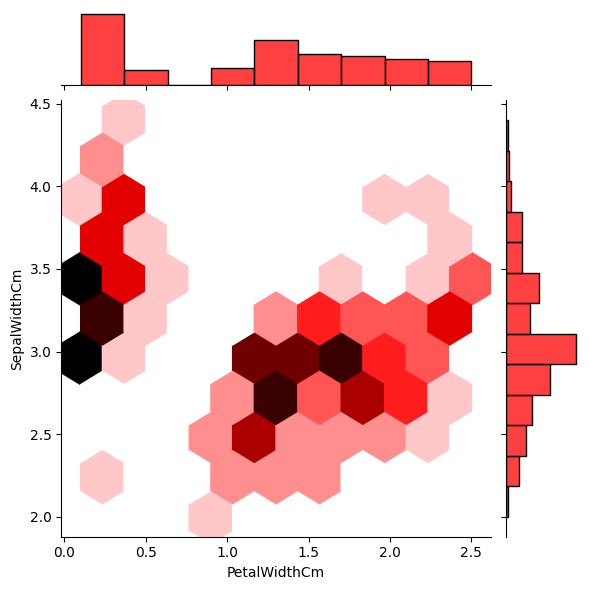

In [17]:
plt.figure(figsize=(8,6))
sns.jointplot(x='PetalWidthCm',y='SepalWidthCm',data=df, kind='hex', color='red')
plt.show()


<Figure size 800x600 with 0 Axes>

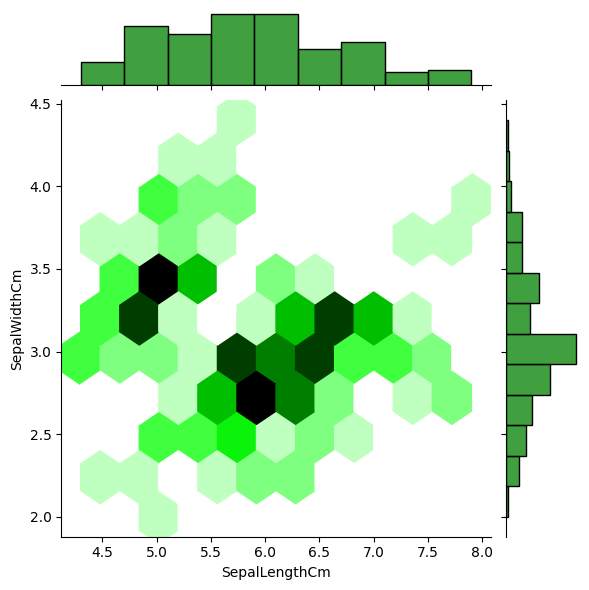

In [9]:
plt.figure(figsize=(8,6))
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='hex', color='green')
plt.show()

<Figure size 800x600 with 0 Axes>

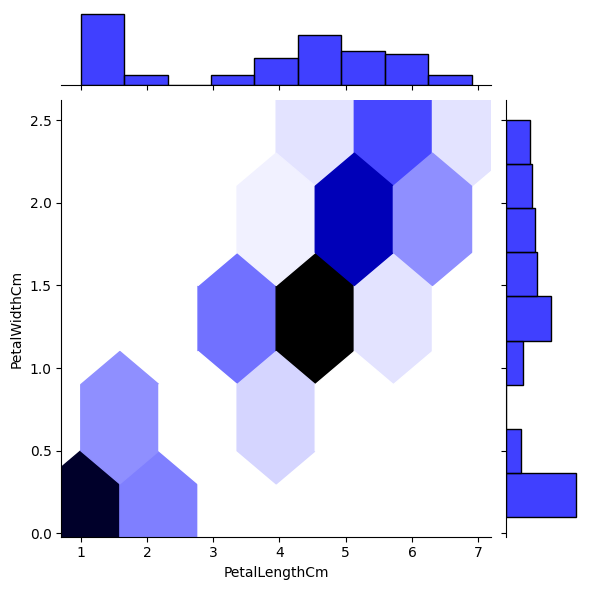

In [10]:
plt.figure(figsize=(8,6))
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df, kind='hex', color='blue')
plt.show()


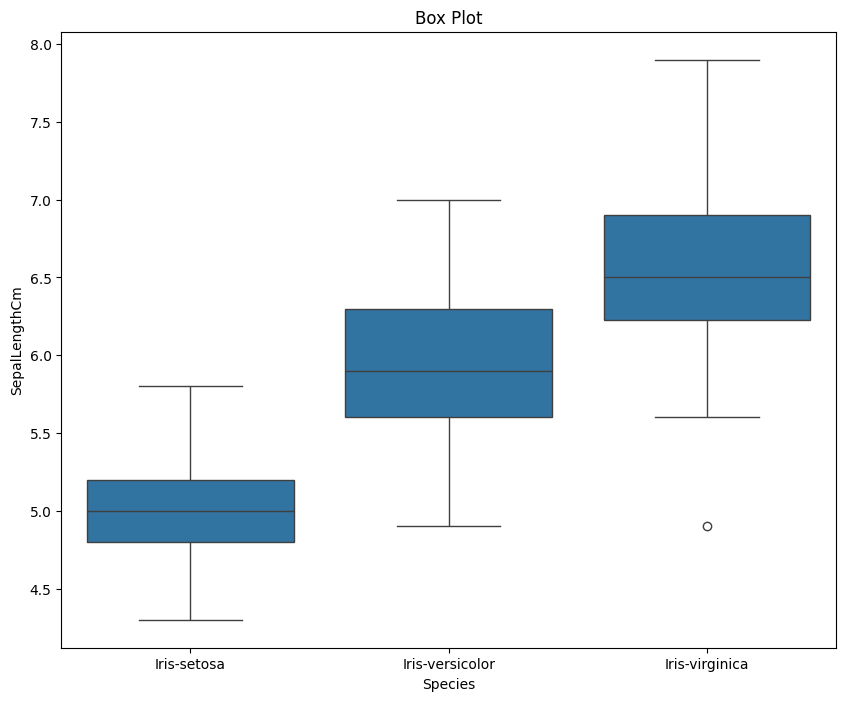

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Box Plot')
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


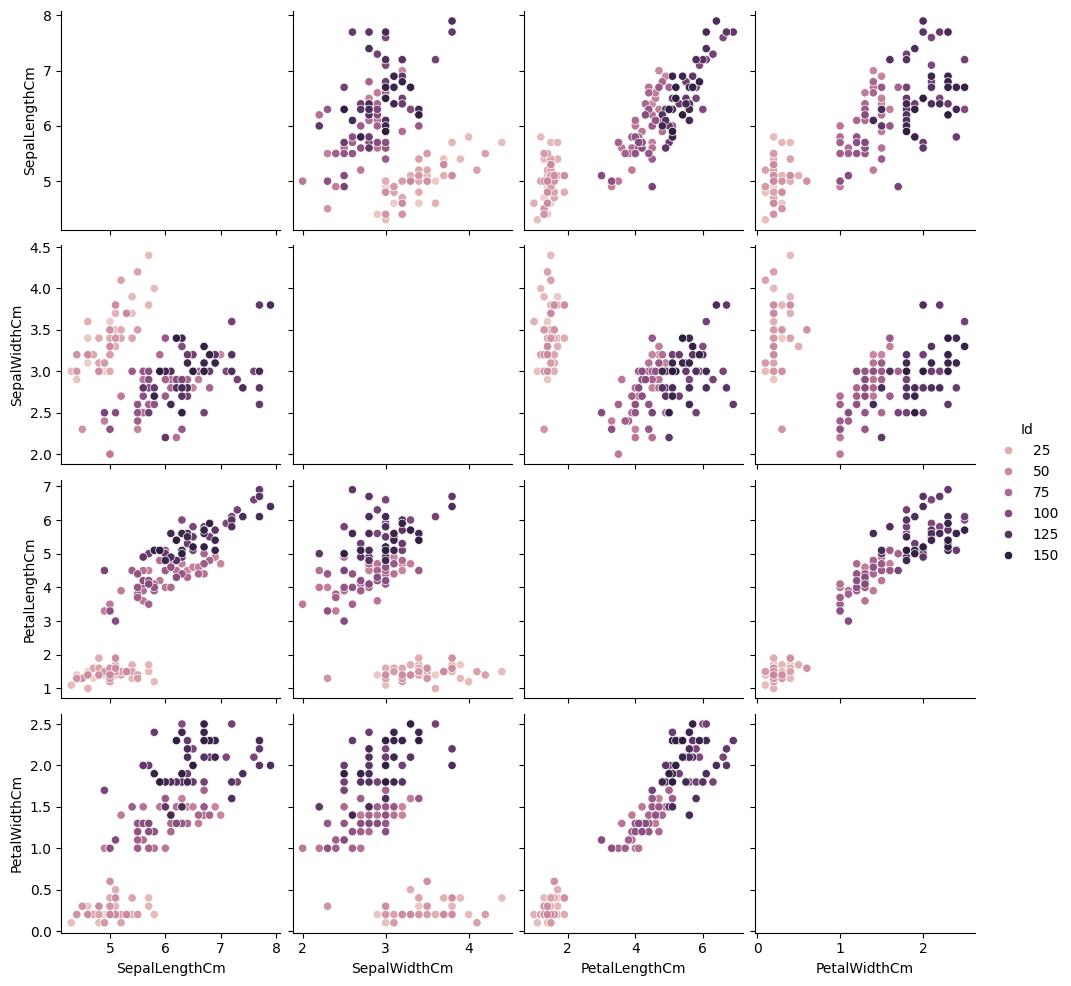

In [31]:
sns.pairplot(data=df, hue='Id')

In [21]:
x = df.iloc[: , 0:4].values
y = df.iloc[:,4].values

In [22]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [ ]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

**Model training**

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([ 1,  1,  1,  1,  1,  3,  2,  1,  1,  0,  1,  1,  0,  0,  1,  3,  3,
        2,  2,  2,  1,  3,  1,  4,  1,  1,  3,  1,  1,  1,  1,  3,  0,  1,
        0,  1,  1,  0,  1,  1,  2,  2,  1,  5,  3,  2,  1,  1,  1,  1, 10,
       11, 11,  9, 11,  9, 12,  6,  9, 10,  6, 11,  6, 10,  9, 10, 11,  6,
       11,  7, 14,  9, 11,  8,  9, 10, 10, 13, 11,  6,  7,  6,  8, 12, 11,
       12, 11,  9,  9,  9,  8, 10,  8,  6,  9,  8,  9,  9,  7,  9, 21, 15,
       17, 14, 18, 17, 13, 14, 14, 21, 16, 15, 17, 16, 20, 19, 14, 18, 19,
       11, 19, 16, 16, 14, 17, 14, 14, 14, 17, 12, 15, 16, 18, 11, 10, 19,
       20, 14, 14, 17, 20, 19, 15, 19, 21, 19, 15, 16, 19, 14])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [ ]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 8, 14,  1,  1,  1, 11, 19, 14,  9,  1, 14, 17, 14,  1,  6,  1, 12,
        2,  0,  6,  7,  1, 15, 14,  1,  1,  1,  9,  1,  9])

In [ ]:
y_test

array([10, 19,  1,  1,  2, 10, 14, 17,  8,  1, 21, 18, 17,  1, 11,  0, 11,
        2,  3, 13,  9,  0, 20, 17,  4,  1,  1,  7,  1, 11])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.26666666666666666

In [ ]:
test_errors = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train , y_train)


    y_pred_test = model.predict(X_test)
    error = 1- accuracy_score(y_test , y_pred_test)
    test_errors.append(error)

test_errors

[0.8,
 0.7666666666666666,
 0.7666666666666666,
 0.7333333333333334,
 0.7333333333333334,
 0.7333333333333334,
 0.7666666666666666,
 0.7333333333333334,
 0.7333333333333334]

In [32]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels, respectively
# Replace these with your actual true and predicted labels
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 2, 1]

# Generate the classification report
report = classification_report(y_true, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.50         5
weighted avg       0.60      0.60      0.60         5

